In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv('wineData.txt', names=['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                                        'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                                        'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])


df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Estudi del dataframe

#### Informació d'atributs:

1) **Alcohol**: Contingut d'alcohol en el vi (en graus)
2) **Malic acid**: Concentració d'àcid màlic en el vi.
3) **Ash**: Contingut de cendra en el vi.
4) **Alcalinity of ash**: Nivell d'alcalinitat de la cendra en el vi.
5) **Magnesium**: Contingut de magnesi en el vi.
6) **Total phenols**: Concentració total de fenols en el vi.
7) **Flavanoids**: Contingut de flavonoides en el vi.
8) **Nonflavanoid phenols**: Concentració de fenols no flavonoides en el vi.
9) **Proanthocyanins**: Contingut de proantocianidines en el vi.
10) **Color intensity**: Intensitat del color del vi.
11) **Hue**: Tonalitat del vi.
12) **OD280/OD315 of diluted wines**: Ràtio entre l'absorbància de 280 nm i l'absorbància de 315 nm del vi diluït.
13) **Proline**: Contingut de prolina en el vi.

In [2]:
# Informació sobre el nombre de columnes, de files i el seu tipus de dada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

El dataframe consta de 13 columnes i 178 files. 

Totes les dades són de tipus float menys les que pertanyen a Class, a Magnesium i a Proline, que són de tipus int. Considero que Magnesium i Proline també podrien ser floats, ja que perfectament les podriem haver definit com a continues. Class ha de ser int ja que és una variable categòrica.

In [3]:
# Descripció estadística del dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [4]:
# Comprovem que no hi hagi valors nulls (no cal fer isna(), ja que a pandas isnull() i isna() és equivalent)

df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

No hi ha valors nulls.

In [5]:
# Comprovem si hi ha duplicats

df[df.duplicated]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


No hi ha duplicats.

In [6]:
# Mirem el nombre de valors únics en cada columna per a trobar columnes susceptibles de ser transformades en dummies.

df.nunique()

Class                             3
Alcohol                         126
Malic acid                      133
Ash                              79
Alcalinity of ash                63
Magnesium                        53
Total phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64

L'única columna que es podria dummyficar és Class, però no ho farem perquè es tracta de la variable target.

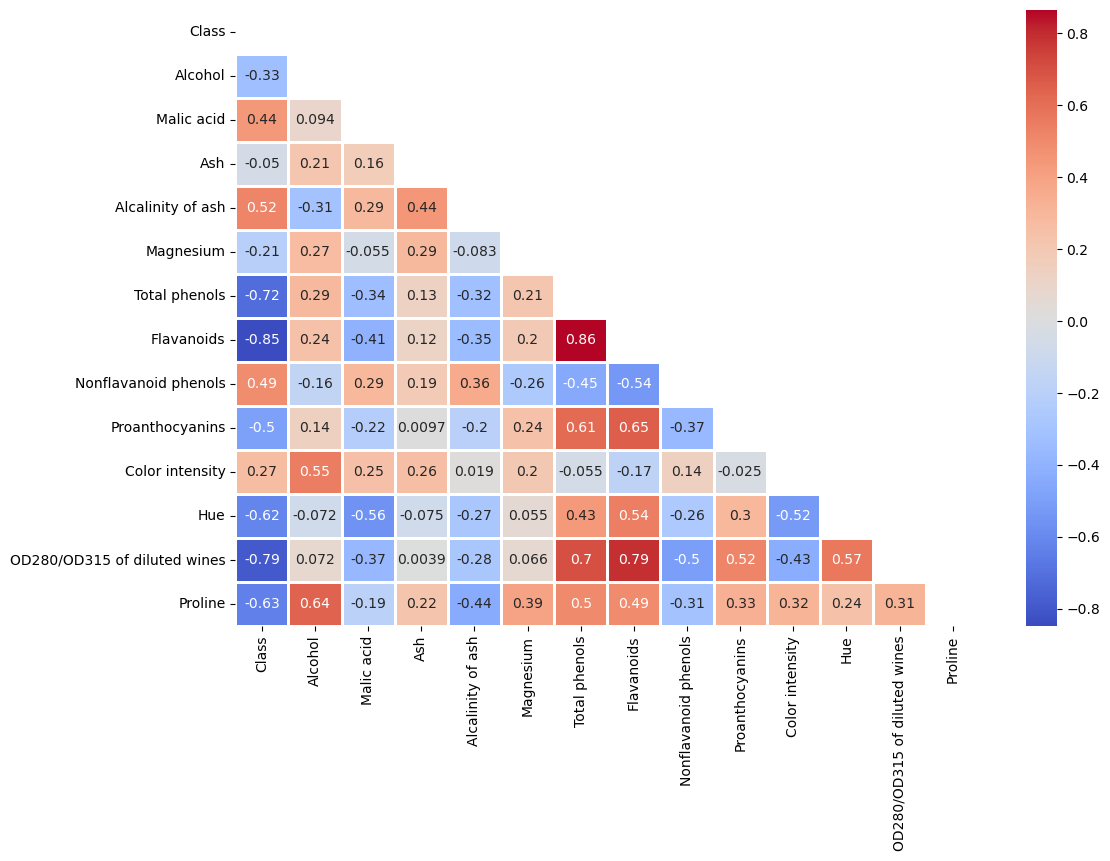

In [7]:
# Fem un mapa de calor per veure les correlacions entre variables

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', linewidths=1, linecolor='white', annot=True)
plt.show()

Podem veure que les variables amb més correlació amb el nostre target (Class) són 'Flavanoids' (-0.85), 'OD280/OD315 of diluted wines' (-0.79) i 'Total phenols' (-0.72).

Les majors correlacions les trobem entre 'Flavanoids' i 'Total phenols' (0.86) i entre  'Flavanoids' i 'OD280/OD315 of diluted wines' (0.79).

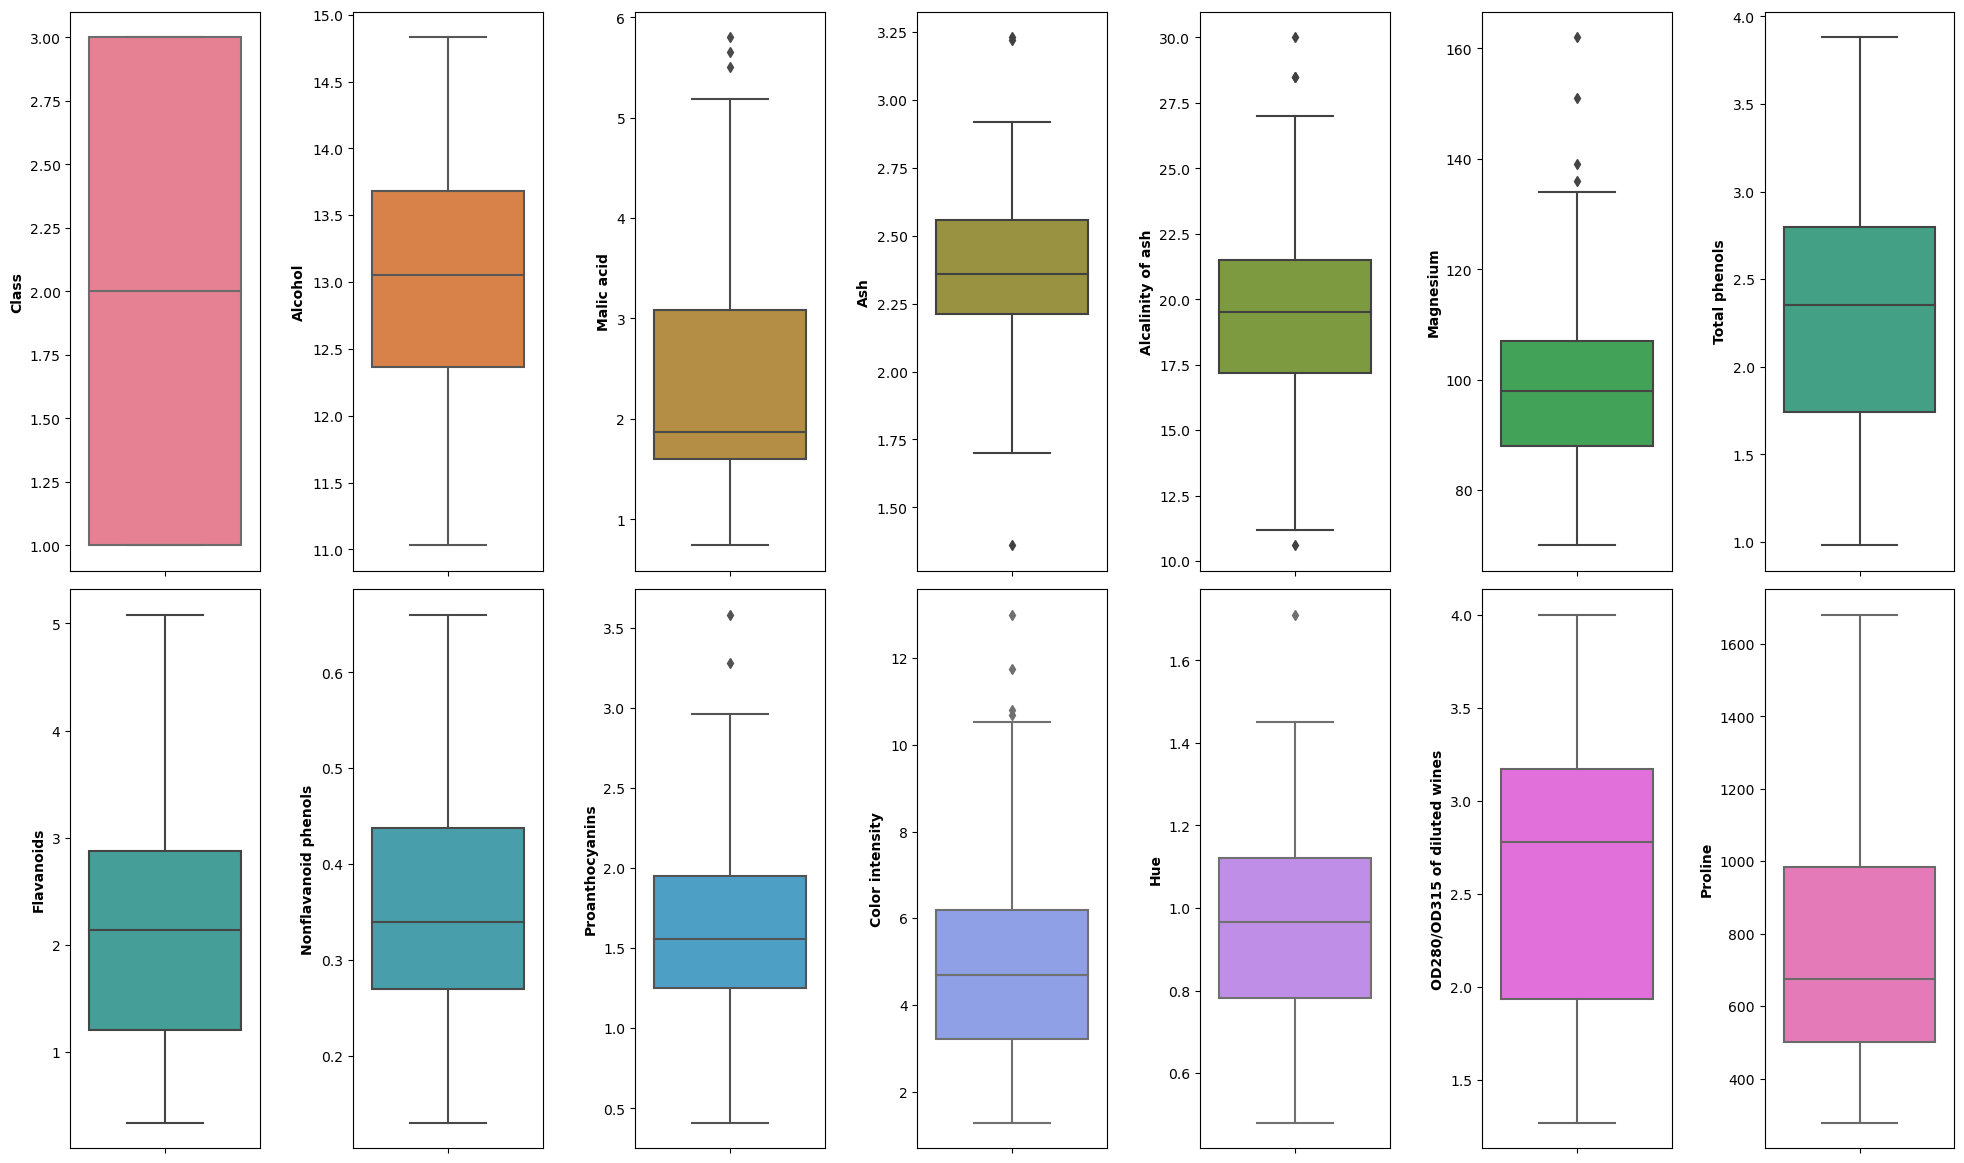

In [8]:
# Fem un boxplot de cada variable per veure els outliers que tenen

colors = sns.color_palette("husl", len(df.columns))

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 12))
count = 0
axs = axs.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(y=column, data=df, ax=axs[count], color=colors[i])
    axs[count].set_ylabel(column, fontweight='bold')
    count += 1

plt.tight_layout(pad=2, w_pad=2, h_pad=1)
plt.show()

Les variables amb outliers són: 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Proanthocyanins', 'Color intensity' i 'Hue'.

Les variables sense outliers són: 'Class', 'Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines' i 'Proline'.

In [9]:
# Apliquem el test de Shapiro a cada variable per veure si tenen una distribució gaussiana

from scipy.stats import shapiro

for column in df.columns:
    stat, p_value = shapiro(df[column])
    is_normal = "Normal" if p_value > 0.05 else "No normal"
    print(f"{column}: {is_normal}")

Class: No normal
Alcohol: No normal
Malic acid: No normal
Ash: No normal
Alcalinity of ash: Normal
Magnesium: No normal
Total phenols: No normal
Flavanoids: No normal
Nonflavanoid phenols: No normal
Proanthocyanins: No normal
Color intensity: No normal
Hue: No normal
OD280/OD315 of diluted wines: No normal
Proline: No normal


Com podem veure, l'única variable que té una distribució normal és 'Alcalinity of ash'.

Resumint:

- Amb outliers i no-gaussianes: 'Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity' i 'Hue'. Aplicarem RobustScaler.

- Amb outliers i gaussianes:  'Alcalinity of ash'. Aplicarem RobustScaler.

- Sense outliers i no-gaussianes: 'Class', 'Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines' i 'Proline'. Aplicarem MinMaxScaler menys a 'Class' que és el nostre target.

In [10]:
# Fem copia abans del preprocessat per no modificar el dataframe original

df_copy = df.copy()

### Preprocessat

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler

columnsNorm = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                 'OD280/OD315 of diluted wines', 'Proline', 'Alcalinity of ash']

df_copy[columnsNorm] = preprocessing.MinMaxScaler().fit_transform(df_copy[columnsNorm])


columnsRobust = ['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']

df_copy[columnsRobust] = preprocessing.RobustScaler().fit_transform(df_copy[columnsRobust])

df_copy.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,-0.104730,0.201439,0.257732,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,0.030928,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,0.412371,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,0.319588,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.536082,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963


### Train/Test

In [12]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(['Class'], axis=1)
y = df_copy['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print('Dimensions del conjunt d\'entrenament:')
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print('Dimensions del conjunt de test:')
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Dimensions del conjunt d'entrenament:
X_train: (142, 13)
y_train: (142,)
Dimensions del conjunt de test:
X_test: (36, 13)
y_test: (36,)


# Exercici 1
### Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print('Predicció amb Logistic Regression:', y_pred_lr[:5])

Predicció amb Logistic Regression: [2 2 1 3 3]


#### Decision tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print('Predicció amb Decision Tree:', y_pred_tree[:5])

Predicció amb Decision Tree: [2. 2. 1. 3. 3.]


# Exercici 2
### Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

#### Precisió (accuracy)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Accuracy (LR):", accuracy_lr.round(2))
print("Accuracy (Decision Tree):", accuracy_tree.round(2))

Accuracy (LR): 0.94
Accuracy (Decision Tree): 0.89


De moment ens trobem amb dos models de classificació molt fiables. Seguirem aplicant mètriques per confirmar la seva fiabilitat.

#### Matriu de confusió

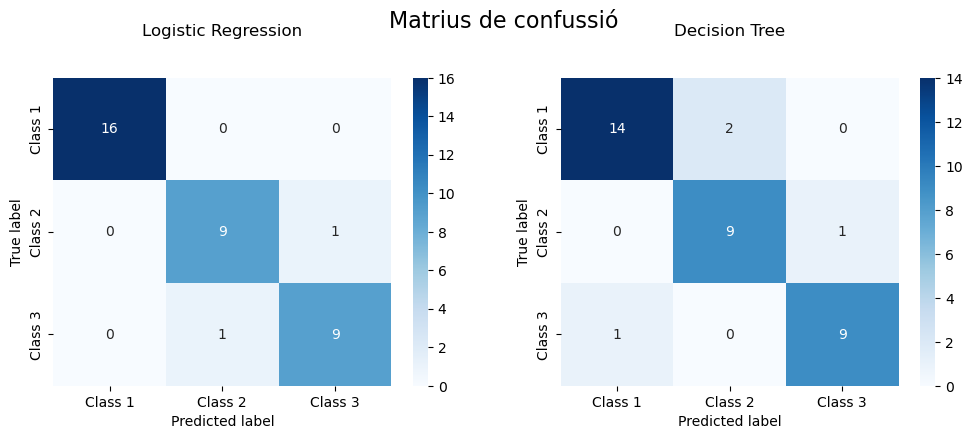

In [16]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)

cm_tree = confusion_matrix(y_test, y_pred_tree)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Logistic Regression", pad=30)
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")
axes[0].set_xticklabels(["Class 1", "Class 2", "Class 3"])
axes[0].set_yticklabels(["Class 1", "Class 2", "Class 3"])

sns.heatmap(cm_tree, annot=True, cmap="Blues", fmt="d", ax=axes[1])
axes[1].set_title("Decision Tree", pad=30)
axes[1].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_xticklabels(["Class 1", "Class 2", "Class 3"])
axes[1].set_yticklabels(["Class 1", "Class 2", "Class 3"])


plt.suptitle("Matrius de confussió", fontsize=16, y=1.05)

plt.show()

#### La matriu de confussió s'interpreta de la següent manera:

En la diagonal [0, 0], [1, 1] i [2, 2] ens trobem els TP (True Positive), que indiquen el nombre de mostres que s'han classificat correctament com a positives per a una classe específica.

Podem comprovar que en el model Logistic Regression ha encertat totes les de la classe 1 (100%), un 90% de la classe 2 i un 90% de la classe 3.

En canvi, el model Decision Tree, ha encertat 14 de la classe 1 (87.5%), 9 de la classe 2 (90%) i 9 de la classe 3 (90%).

#### Altres mètriques (precision, recall, f1-score i support)

In [17]:
from sklearn.metrics import classification_report

print('Logistic Regression: \n\n', classification_report(y_test, y_pred_lr), '\n\n')
print('Decision Tree:  \n\n', classification_report(y_test, y_pred_tree))

Logistic Regression: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.90      0.90      0.90        10
           3       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36
 


Decision Tree:  

               precision    recall  f1-score   support

           1       0.93      0.88      0.90        16
           2       0.82      0.90      0.86        10
           3       0.90      0.90      0.90        10

    accuracy                           0.89        36
   macro avg       0.88      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



#### Significat de les mètriques de la taula:

**Precision (Precisió)**: Mesura la proporció d'exemples positius correctament classificats sobre el total d'exemples classificats com a positius. Com més alta sigui la precisió, menys falsos positius hi haurà. 

**Recall (Sensibilitat)**: Mesura la proporció d'exemples positius correctament classificats sobre el total d'exemples que són realment positius. Com més alt sigui el recall, menys falsos negatius hi haurà. 

**F1-score**: És una mesura combinada que utilitza tant la precisió com el recall. És útil quan volem tenir en compte tant els falsos positius com els falsos negatius. El F1-score és la mitjana harmònica de la precisió i el recall. 

**Suport (Support)**: És el nombre de mostres de cada classe al conjunt de dades de prova. L'informe de classification_report mostrarà aquestes mètriques per a cada classe individualment, així com les mètriques mitjana ponderades, que tenen en compte la distribució de les classes al conjunt de dades. Les mètriques mitjana ponderades són particularment útils quan les classes estan desequilibrades en el conjunt de dades.

**macro avg**: La mitjana macro calcula les mètriques per classe i després pren la mitjana sense tenir en compte el desequilibri de classes. Això vol dir que tracta totes les classes per igual i assigna el mateix pes a cada classe, sense importar-ne la mida. És útil quan totes les classes són igualment importants i no hi ha un desequilibri significatiu entre elles.

**weighted avg**: La mitjana ponderada, per altra banda, calcula les mètriques per classe i les pondera pel nombre de mostres a cada classe. Té en compte el desequilibri de classes i dóna més pes a les classes amb més mostres. És útil quan hi ha un desequilibri entre les classes i es vol tenir en compte l'impacte de cada classe en general.


Per tant, en aquest cas tindrem en compte el weighted avg, ja que no totes les classes tenen el mateix nombre de mostres. Podem veure que el model Logistic Regression és més precís (0.94) que el Decision Tree (0.89).

# Exercici 3
### Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

#### Logistic Regression

In [18]:
# Mirem els hiperparàmetres

print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [19]:
# Com que el dataframe no és gran, utilitzarem GridSearchCV per a obtenir els millors valors dels hiperparàmetres

from sklearn.model_selection import GridSearchCV

# Creem diccionari amb els hiperparàmetres més importants

param_lr = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty':['none', 'elasticnet', 'l1', 'l2'],
            'C':[0.001, 0.01, 0.1, 1, 10, 100],
            'class_weight': ['balanced', None],
            'warm_start': [True, False],
            'dual': [True, False],
            'fit_intercept': [True, False],
            'intercept_scaling': [1, 5, 10],
            'random_state': [None, 3, 9]}

# Busquem els millors valors

grid_lr = GridSearchCV(estimator=lr, param_grid=param_lr)

grid_lr.fit(X_train, y_train)

print("Millors hiperparàmetres:", grid_lr.best_params_)

Millors hiperparàmetres: {'C': 10, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'warm_start': True}


Ens diu que hem de canviar els valors de 'C', 'class_weight', 'penalty', 'solver' i 'warm_start'.

In [20]:
lr_best = LogisticRegression(C=10, class_weight='balanced', penalty='l1', solver='liblinear', warm_start=True).fit(X_train, y_train)

y_pred_lr_best = lr_best.predict(X_test)

accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
print("Accuracy (LR):", accuracy_lr_best.round(2))

Accuracy (LR): 0.94


#### Decision Tree

In [21]:
# Mirem els hiperparàmetres

print(tree.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [22]:
# Creem diccionari amb els hiperparàmetres més importants

param_tree = {'ccp_alpha': [0.0, 3.0, 7.0],
              'criterion': ['squared_error', 'entropy', 'log_loss', 'gini'], 
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4], 
              'random_state': [3, 10, None], 
              'splitter': ['best', 'random'],
              'max_features': ['auto', 'sqrt', 'log2', None]}

                
# Busquem els millors valors

grid_tree = GridSearchCV(estimator=tree, param_grid=param_tree)

grid_tree.fit(X_train, y_train)

print("Millors hiperparàmetres:", grid_tree.best_params_)

Millors hiperparàmetres: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': None, 'splitter': 'random'}


Ens diu que hem de canviar els valors de 'max_features'.

In [23]:
tree_best = DecisionTreeRegressor(max_features='auto').fit(X_train, y_train)

y_pred_tree_best = tree_best.predict(X_test)

accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy (Tree):", accuracy_tree_best.round(2))

Accuracy (Tree): 0.86


Fem un dataframe per comparar.

In [24]:
metrics = pd.DataFrame(data=[['Logistic Regression', accuracy_lr], 
                            ['Decision Tree', accuracy_tree],
                            ['Logistic Regression tuned', accuracy_lr_best], 
                            ['Decision Tree tuned', accuracy_tree_best]],
                            columns=['Model', 'Accuracy'])

metrics = metrics.round(decimals=2)
metrics.head()

,Model,Accuracy
0,Logistic Regression,0.94
1,Decision Tree,0.89
2,Logistic Regression tuned,0.94
3,Decision Tree tuned,0.86


Com podem veure, el Logistic Regression s'ha quedat igual (0.94) però el Decision Tree ha empitjorat (de 0.89 a 0.86).

# Exercici 4
### Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

#### Validació interna del model Linear Regression

In [25]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='accuracy')

promig_cv_lr = cv_lr.mean()

print('Promig d\'accuracy fent CV al model Linear Regression', round(promig_cv_lr, 2))

Promig d'accuracy fent CV al model Linear Regression 0.96


#### Validació interna del model Decision Tree

In [26]:
cv_tree = cross_val_score(DecisionTreeRegressor(), X, y, cv=5, scoring='accuracy')

promig_cv_tree = cv_tree.mean()

print('Promig d\'accuracy fent CV al model Decision Tree', round(promig_cv_tree, 2))

Promig d'accuracy fent CV al model Decision Tree 0.89


In [27]:
metrics_cv = pd.DataFrame(data=[['Logistic Regression', accuracy_lr],
                                ['Decision Tree', accuracy_tree],
                                ['Logistic Regression CV', promig_cv_lr],
                                ['Decision Tree CV', promig_cv_tree]],
                          columns=['Model', 'Accuracy'])

metrics_cv = metrics_cv.round(decimals=2)
metrics_cv.head()

,Model,Accuracy
0,Logistic Regression,0.94
1,Decision Tree,0.89
2,Logistic Regression CV,0.96
3,Decision Tree CV,0.89


Utilitzant cross-validation, el model Logistic Regression ha augmentat la precisió 2 centèsimes (de 0.94 a 0.96) i el Decision Tree s'ha quedat igual (de 0.89).

# Exercici 5
### Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [28]:
# Comprovem la multicol·linealitat amb el mètode de Variance Inflation Factor(VIF)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Seleccionem les variables predictores

predictors = df[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']]


# Afegim una columna constant per a l'intercepció del model de regressió

predictors = sm.add_constant(predictors)


# Calculem el VIF per a cada variable predictora

vif = pd.DataFrame()
vif['Variable'] = predictors.columns
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

print(vif)

                        Variable         VIF
0                          const  680.485185
1                        Alcohol    2.460372
2                     Malic acid    1.656647
3                            Ash    2.185448
4              Alcalinity of ash    2.238732
5                      Magnesium    1.417855
6                  Total phenols    4.334519
7                     Flavanoids    7.029350
8           Nonflavanoid phenols    1.796380
9                Proanthocyanins    1.975683
10               Color intensity    3.026304
11                           Hue    2.551447
12  OD280/OD315 of diluted wines    3.785473
13                       Proline    2.823849


Un valor de VIF menor que 5 es considera acceptable, mentre que un valor més gran que 5 indica la presència de multicol·linealitat significativa.

Totes les variables menys "Flavanoids" tenen valors de VIF inferiors a 5, cosa que suggereix que tenen una baixa o moderada correlació amb altres variables predictores.

D'altra banda, la variable "Flavanoids" té valors de VIF superiors a 5, cosa que indica la presència d'una correlació més forta amb altres variables predictores. Això suggereix que aquesta variable pot tenir multicol·linealitat amb altres variables.